# Sales Analysis

In [11]:
#Import necessary libraries
import pandas as pd
import os

In [12]:
path = '..\..\data\Sales_Data'
files = [path+ "\\" + file for file in os.listdir(path)]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv(path + "\\" + file)
    all_months_data = pd.concat([all_months_data, df])
# metadata = pd.concat([pd.read_csv(file) for file in files])
# metadata.head(10)\
all_months_data.to_csv("all_data.csv", index = False)

In [38]:
all_data = pd.read_csv(path + "\\all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Drop Nan

In [39]:
all_data = all_data.dropna(how = 'all')

In [40]:
# drop or and delete it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Augment data

In [41]:
# add month column

all_data['Month'] = all_data['Order Date'].str[0:2].astype('int32')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [42]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [44]:
results = all_data.groupby('Month').sum()

range(1, 13)


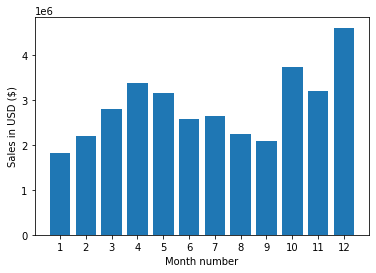

In [45]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

In [78]:
# What US city had the highest # of sales.
def get_state(addi):
   return addi.split(",")[2].strip(" ")[0:2]

def get_city(addi):
    return addi.split(",")[1].strip("")
all_data['City'] = all_data['Purchase Address'].apply(lambda x:  f'{get_city(x)} ({get_state(x)})')
city_df = all_data.groupby(['City']).sum()
city_df

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


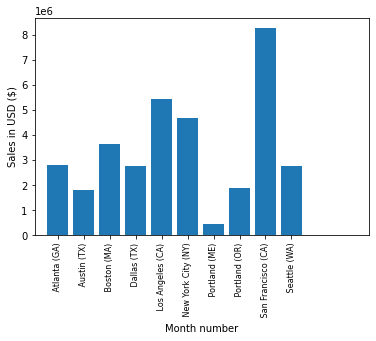

In [90]:
keys =  all_data.groupby(['City']).groups.keys()
key = [k for k in keys]
#key = [city for city, df in all_data.groupby(['City'])]
plt.bar(key,city_df['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(key, rotation='vertical', size=8)
plt.show()

In [95]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Count'] = 1
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,1
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,1
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,1
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,1


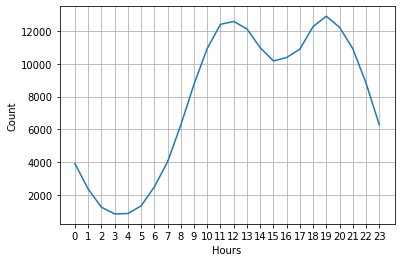

In [105]:
hour_df = all_data.groupby(['Hour']).sum()
hour = range(0, 24)
plt.plot(hour,hour_df['Count'])
plt.xticks(hour)
plt.ylabel('Count')
plt.xlabel('Hours')
plt.grid()
plt.show()
# keys = [pair for pair, df in all_data.groupby(['Hour'])]

# plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
# plt.xticks(keys)
# plt.grid()
# plt.show()

In [151]:
#my approach
df = all_data[all_data['Order ID'].duplicated(keep = False)]
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df = df[df['Order ID'].duplicated(keep = 'first')]
# df = df['Grouped'].apply(lambda x : sorted(x))
df = df.groupby(['Grouped']).count()
df = df.sort_values(['Count'], ascending = False)
df.head(10)

<ipython-input-151-f8b4816ced1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
Grouped,,,,,,,,,,,
"iPhone,Lightning Charging Cable",882,882,882,882,882,882,882,882,882,882,882
"Google Phone,USB-C Charging Cable",856,856,856,856,856,856,856,856,856,856,856
"iPhone,Wired Headphones",361,361,361,361,361,361,361,361,361,361,361
"Vareebadd Phone,USB-C Charging Cable",312,312,312,312,312,312,312,312,312,312,312
"Google Phone,Wired Headphones",303,303,303,303,303,303,303,303,303,303,303
"iPhone,Apple Airpods Headphones",286,286,286,286,286,286,286,286,286,286,286
"Google Phone,Bose SoundSport Headphones",161,161,161,161,161,161,161,161,161,161,161
"Google Phone,USB-C Charging Cable,Wired Headphones",154,154,154,154,154,154,154,154,154,154,154
"iPhone,Lightning Charging Cable,Wired Headphones",112,112,112,112,112,112,112,112,112,112,112


In [150]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()    

<ipython-input-150-69367b9f88d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [152]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# count.most_common(10)
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


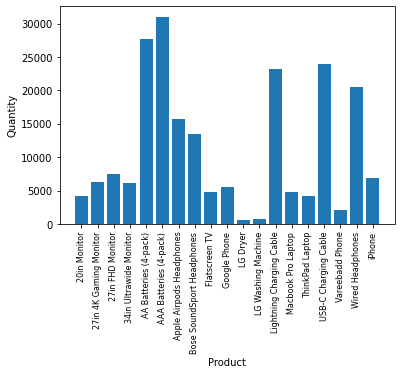

In [167]:
ms = all_data.groupby(['Product'])['Quantity Ordered'].sum()
product = [p for p, df in all_data.groupby(['Product'])]
#key = [city for city, df in all_data.groupby(['City'])]
plt.bar(product,ms)
plt.xticks(product)
plt.ylabel('Quantity')
plt.xlabel('Product')
plt.xticks(product, rotation='vertical', size=8)
plt.show()

<ipython-input-182-9e0016350091>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(product, rotation='vertical', size=8)


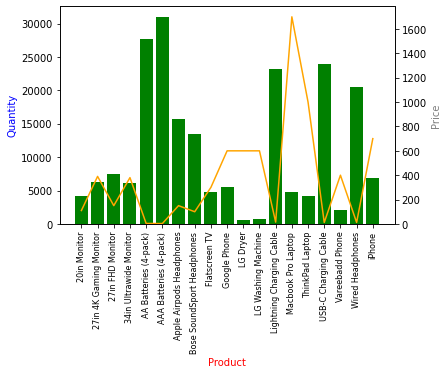

In [182]:
prices = all_data.groupby(['Product']).mean()['Price Each']
fig,ax = plt.subplots()

# plot

ax.bar(product, ms, color='green')

ax.set_xlabel('Product', color = 'red')

# add primary y-axis label

ax.set_ylabel('Quantity', color = 'blue')

# define second y-axis

ax2 = ax.twinx()

# plot

ax2.plot(product, prices, color='orange', marker ='o')

# Align to 0

ax2.set_ylim(bottom=0)

# add second y-axis label


ax2.set_ylabel('Price', color = 'grey')
ax.set_xticklabels(product, rotation='vertical', size=8)

# Display

plt.show()

<ipython-input-181-978fb955c835>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
<ipython-input-181-978fb955c835>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


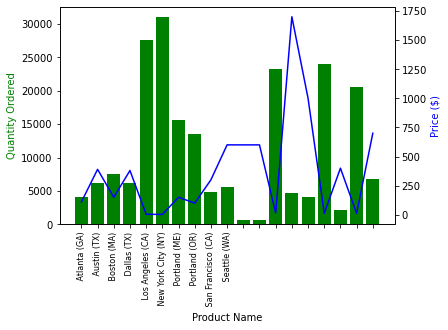

In [181]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, ms, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()